<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Aula_Coleta_imagens_limpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A atividade de ajuste dos dados e eventuais remoções de dados indesejados implica em diferentes tarefas. A seguir serão demonstrados alguns comandos para ser feito esta limpeza inicial dos dados.

Preparando o ambiente

In [1]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

O comando abaixo serve para você adicionar adicionar figuras ou arquivos a partir do seu Google drive.

In [2]:
#O comando a seguir vai requerer autenticação no seu Google drive com a sua senha
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Criar a definição da função show_image

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

Agora o comando propriamente dito para adicionar uma imagem.

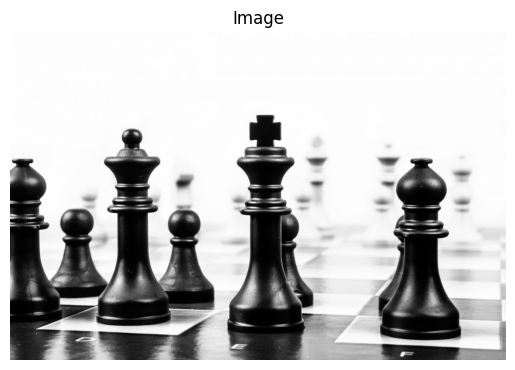

In [4]:
img1 = plt.imread("/content/drive/MyDrive/data-mineracao/Itapaje-20240123T144514Z-001/Itapaje/imagens/chess_gray.png")
show_image (img1);

Importar imagem e alterar a palheta de cores.

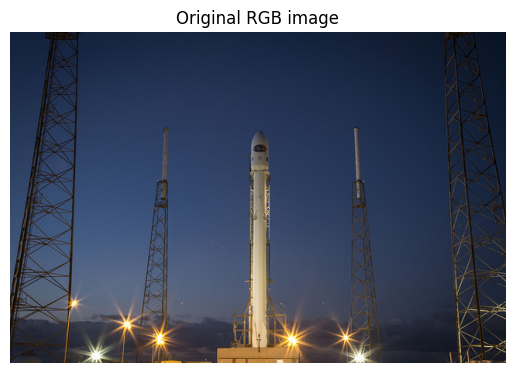

In [5]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image');

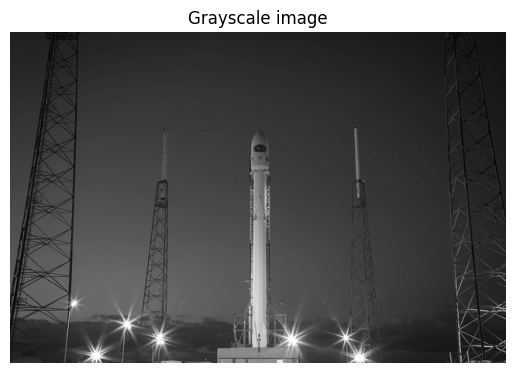

In [6]:
# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

Pra verificar o tamanho original da imagem

In [7]:
rocket.shape

(427, 640, 3)

Para redefinir o tamanho de uma imagem usa-se rescale e resize. O primeiro altera a escala mudando o mapa de cores. O segundo somente altera o tamanho da imagem.

Text(0.5, 1.0, 'Imagem Re-scalonada')

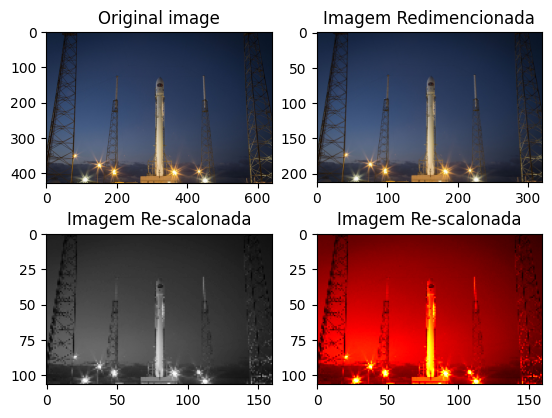

In [8]:
from skimage.transform import rescale, resize, downscale_local_mean
image = data.rocket()
image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
                       anti_aliasing=True)
image_rescaled = rescale(image, 0.25, anti_aliasing=False)

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_resized, cmap='gray')
ax[1].set_title("Imagem Redimencionada")

ax[2].imshow(image_rescaled, cmap='gray')
ax[2].set_title("Imagem Re-scalonada")

ax[3].imshow(image_rescaled, cmap='hot')
ax[3].set_title("Imagem Re-scalonada")

Uma imagem pode ser particionada em primeiro e segundo plano ao torná-la preto e branco. Estes é um método mais simples de segmentação de imagens. A ***Segmentação*** é uma maneira de se separar imagens de interesse, para depois encontrar um padrão e efetuar uma classificação.

Os comandos abaixo são a sequência para ser realizada esta tarefa.

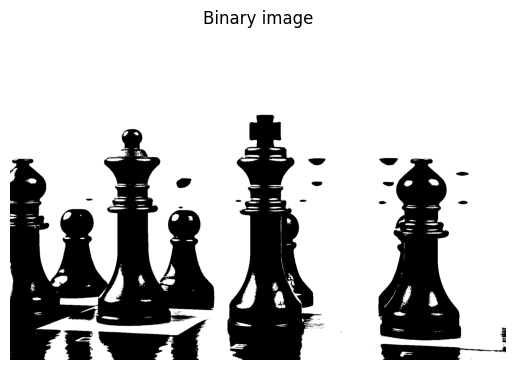

In [9]:
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(img1)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

Outra tarefa importante é a questão de inverter uma figura. Isto pode ser útil para deixas as imagens em um mesmo padrão de visualização. Observe a seqüência abaixo.

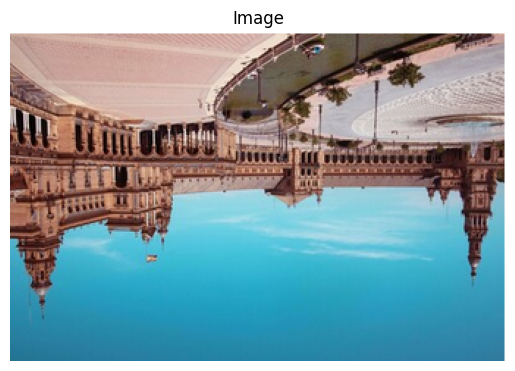

In [10]:
img_seville = plt.imread("/content/drive/MyDrive/data-mineracao/Itapaje-20240123T144514Z-001/Itapaje/imagens/flipped_seville.png")

#Mostra a imagem original
show_image (img_seville);

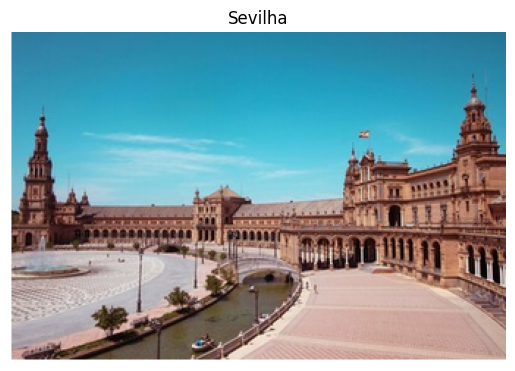

In [11]:
# Flip the image vertically
seville_vertical_flip = np.flipud(img_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Sevilha')

O Threshold pode ser alterado para melhor binarizar uma imagem de ferramentas de tricô e artesanato, por exmplo.

Ao fazer isso, você poderá ver com mais clareza as formas dos objetos, desde corações de papel até tesouras.

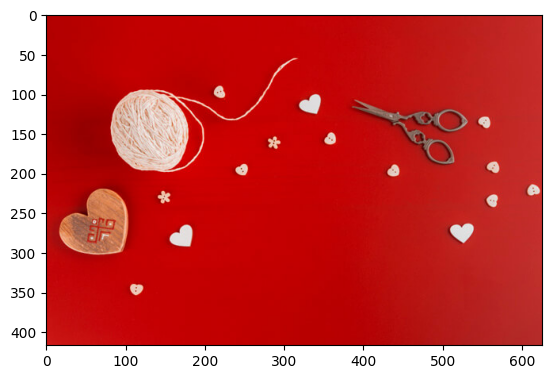

In [12]:
import matplotlib.pyplot as plt
tools_image = plt.imread('/content/drive/MyDrive/data-mineracao/Itapaje-20240123T144514Z-001/Itapaje/imagens/shapes52.jpg')

plt.imshow(tools_image);

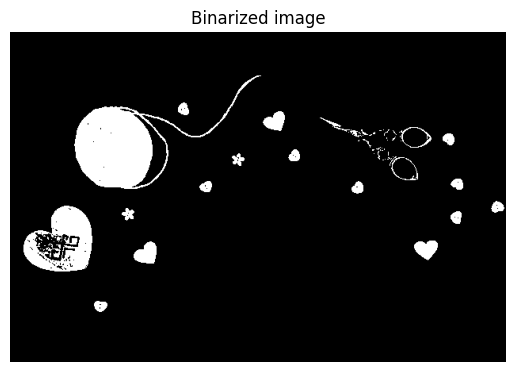

In [13]:
tools_image = plt.imread('/content/drive/MyDrive/data-mineracao/Itapaje-20240123T144514Z-001/Itapaje/imagens/shapes52.jpg')
from skimage.filters import threshold_otsu
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')